# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Nisrina Diva Sulalah]
- **Email:** [nisrinadiva@student.ub.ac.id]
- **ID Dicoding:** [nisrinadiva]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan temperatur feeling (yang dirasakan manusia) dan temperatur aktual mempengaruhi jumlah peminjaman sepeda?
- Pada musim apa peminjaman sepeda mencapai jumlah terbanyak pada tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Mengimport semua packages yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Mengabaikan pesan peringatan (warnings) yang muncul
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
#Membaca data CSV dari file dan menampilkan 5 baris pertama
hour_bike = pd.read_csv("/home/hour.csv")
hour_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
#Menampilkan informasi dari data hour_bike
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#Menampilkan 5 baris pertama data untuk mengakses data kembali
hour_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Duplikasi Data**

In [6]:
#Mengecek duplikasi dari data dengan lebih cepat
print("Jumlah duplikasi data: ", hour_bike.duplicated().sum())

Jumlah duplikasi data:  0


Jumlah duplikasi : 0 menunjukkan tidak ada data yang terduplikasi.

In [7]:
#Menghitung jumlah nilai-nilai yang hilang (missing values) dalam setiap kolom dari dataframe
hour_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Result 0 menunjukkan tidak ada missing value dari data.

**Parameter Statistik pada Kolom Numerik**

In [8]:
#Mendeskripsikan parameter statistik dari data
hour_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [9]:
#Membersihkan data numerik apabila memiliki data yang kosong dengan fungsi fillna()
hour_bike.fillna(value=hour_bike.mean(numeric_only=None), inplace=True)

In [10]:
#Mengatasi jika terdapat duplikasi data
hour_bike.drop_duplicates(inplace=True)

In [11]:
#Membersihkan data dengan menghapus kolom yang tidak diperlukan
hour_bike = hour_bike.drop("instant", axis=1)
#Menampilkan data untuk mengecek apakah sudah berhasil terhapus
hour_bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
#Menampilkan kembali informasi dari data hour_bike setelah proses-proses sebelumnya
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [13]:
#Mendeskripsikan kembali parameter statistik dari data
hour_bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


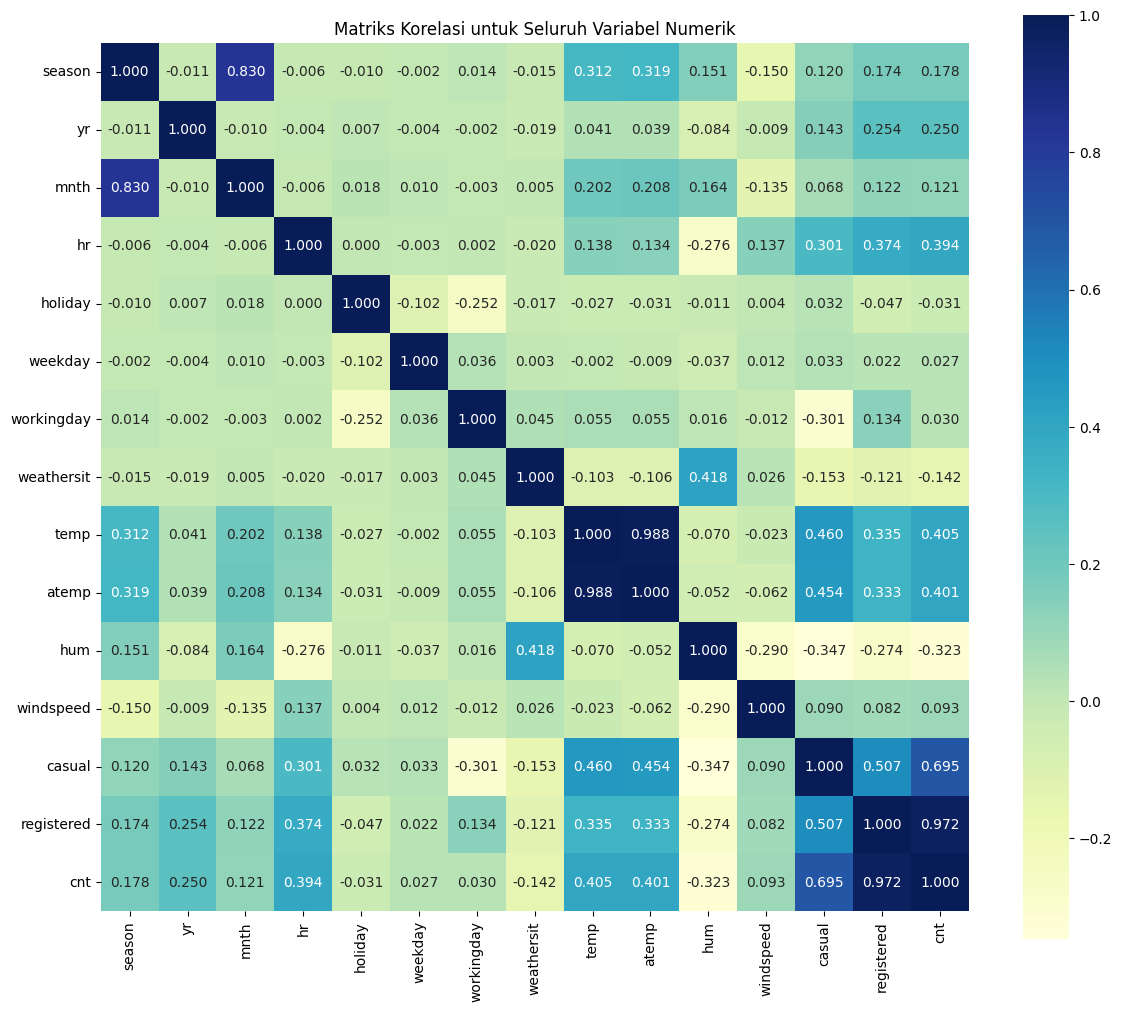

In [14]:
#Menampilkan korelasi antar variabel numerik saja
plt.figure(figsize=(14, 12))
sns.heatmap(hour_bike.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".3f", square=True)
plt.title('Matriks Korelasi untuk Seluruh Variabel Numerik')

plt.show()

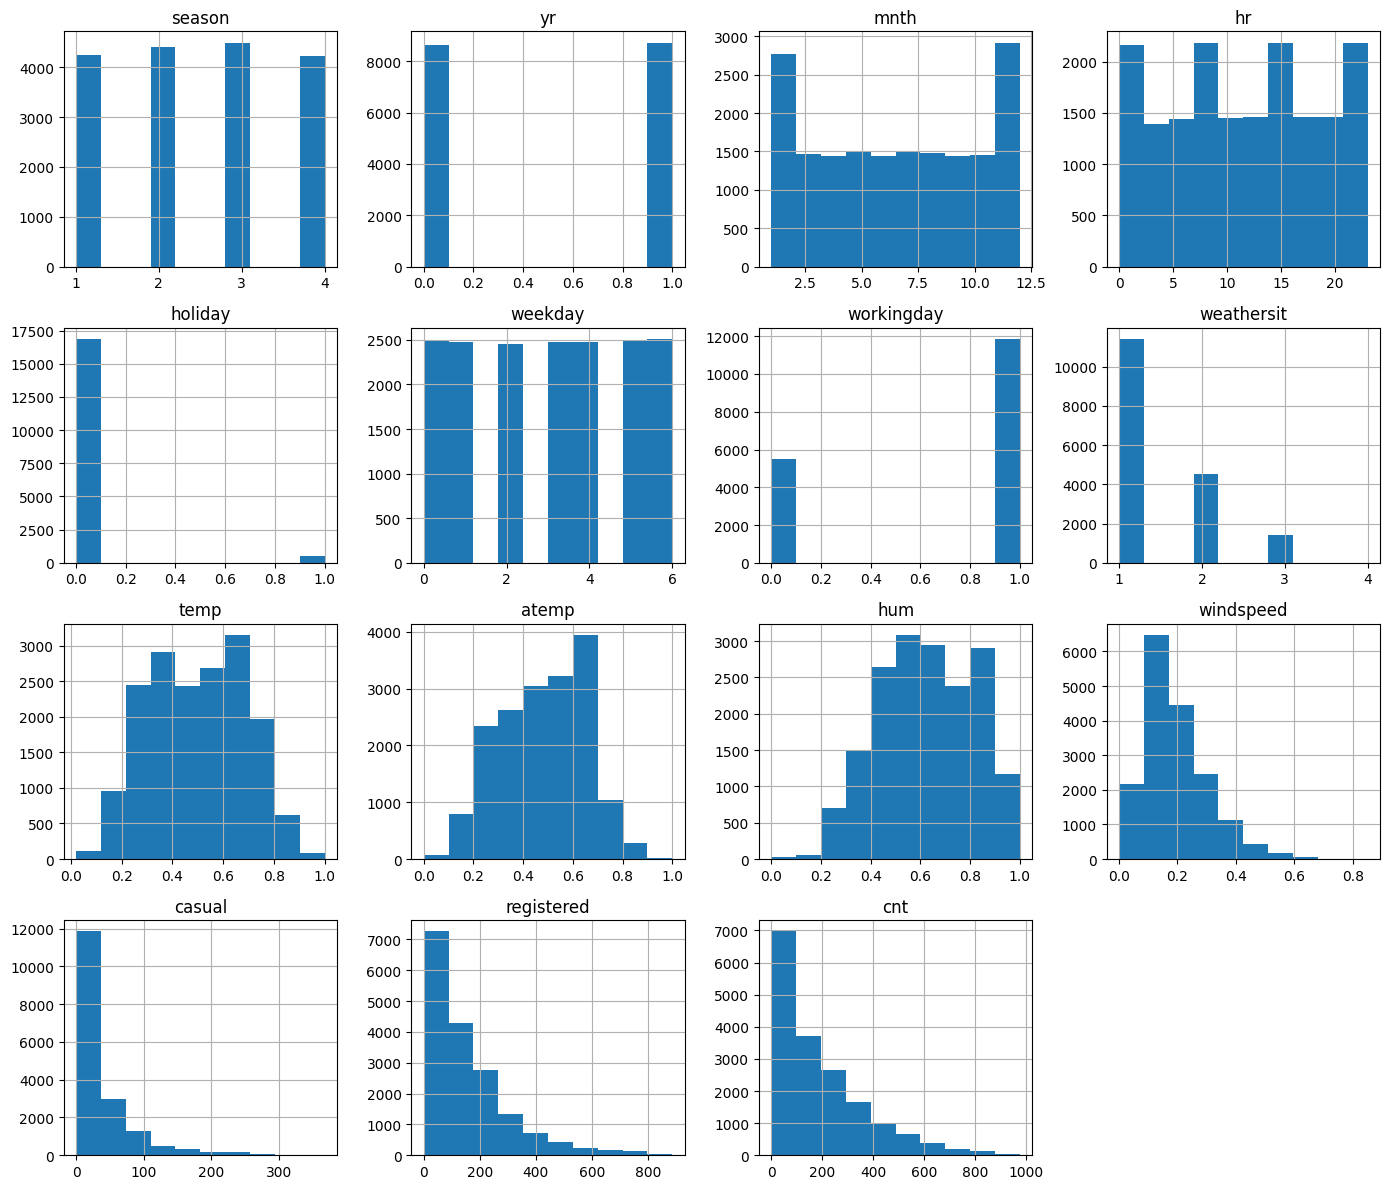

In [15]:
#Melihat distribusi data secara keseluruhan
hour_bike.hist(figsize=(14, 12))
plt.tight_layout()
plt.show()

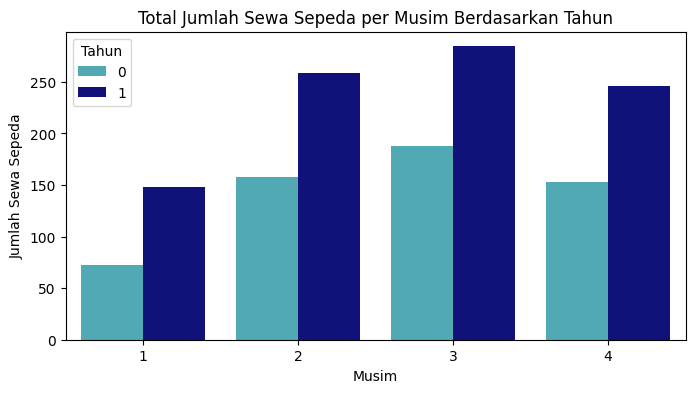

In [16]:
#Mengeksplorasi bagaimana perubahan jumlah sewa sepeda di setiap musim dari tahun ke tahun
plt.figure(figsize=(8, 4))
colors=["#41b6c4", "darkblue"]
sns.barplot(x='season', y='cnt', hue='yr', data=hour_bike, palette=colors, errorbar=None)
plt.xlabel("Musim") #season/musim (1:spring, 2:summer, 3:fall, 4:winter)
plt.ylabel("Jumlah Sewa Sepeda")
plt.title("Total Jumlah Sewa Sepeda per Musim Berdasarkan Tahun")
plt.legend(title='Tahun') #tahun (0:2011, 1:2012)

plt.show()

In [17]:
#Mendeskripsikan beberapa kolom terpilih yang akan digunakan untuk analisis data
kolom_analisis1 = ['atemp', 'temp', 'cnt']
selected_df1 = hour_bike[kolom_analisis1]

selected_df1.describe()
#selected_df1 = dataframe berisi kolom yang akan digunakan untuk analisis data soal nomor 1

,atemp,temp,cnt
count,17379.000000,17379.000000,17379.000000
mean,0.475775,0.496987,189.463088
std,0.171850,0.192556,181.387599
min,0.000000,0.020000,1.000000
25%,0.333300,0.340000,40.000000
50%,0.484800,0.500000,142.000000
75%,0.621200,0.660000,281.000000
max,1.000000,1.000000,977.000000


In [18]:
#Mengeksplor korelasi data numerik dari selected_df1
selected_df1.corr()

,atemp,temp,cnt
atemp,1.000000,0.987672,0.400929
temp,0.987672,1.000000,0.404772
cnt,0.400929,0.404772,1.000000


Dari result tersebut:
* atemp dan temp berkorelasi positif dengan nilai 1, artinya ada korelasi antara keduanya dan berkesesuaian sempurna.
* atemp dan cnt berkorelasi positif dengan nilai 0.4, artinya ada korelasi antara keduanya.
* temp dan cnt berkorelasi positif dengan nilai hampir mencapai 1, artinya ada korelasi antara keduanya.




In [19]:
#Mendeskripsikan beberapa kolom terpilih yang akan digunakan untuk analisis data
kolom_analisis2 = ['season', 'yr', 'cnt']
selected_df2 = hour_bike[kolom_analisis2]

selected_df2.describe()
#selected_df2 = dataframe berisi kolom yang akan digunakan untuk analisis data soal nomor 2

,season,yr,cnt
count,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,189.463088
std,1.106918,0.500008,181.387599
min,1.000000,0.000000,1.000000
25%,2.000000,0.000000,40.000000
50%,3.000000,1.000000,142.000000
75%,3.000000,1.000000,281.000000
max,4.000000,1.000000,977.000000


In [20]:
#Mengeksplor korelasi data numerik dari selected_df2
selected_df2.corr()

,season,yr,cnt
season,1.000000,-0.010742,0.178056
yr,-0.010742,1.000000,0.250495
cnt,0.178056,0.250495,1.000000


Dari result tersebut:

* season dan cnt berkorelasi positif dengan nilai 0.4, artinya ada korelasi antara keduanya.
* season dan yr berkorelasi negatif, artinya tidak ada korelasi antara keduanya.
* yr dan cnt berkorelasi positif dengan nilai 0.5, artinya ada korelasi antara keduanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hubungan temperatur feeling (yang dirasakan manusia) dan temperatur aktual mempengaruhi jumlah peminjaman sepeda?

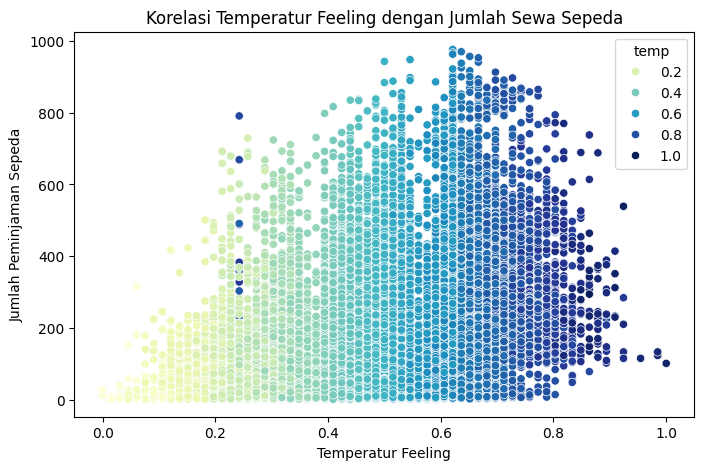

In [21]:
#Menggunakan scatterplot untuk melihat persebaran data antara temperatur feeling dengan jumlah sewa sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(data=hour_bike, x='atemp', y='cnt', hue='temp', palette='YlGnBu')
plt.xlabel('Temperatur Feeling')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Korelasi Temperatur Feeling dengan Jumlah Sewa Sepeda')

plt.show()

### Pertanyaan 2:

Pada musim apa peminjaman sepeda mencapai jumlah terbanyak pada tahun 2012?




In [22]:
#Mengelompokkan season dan year
#dengan menggunakan groupby() dan total jumlah sewa sepeda
#untuk menentukan jumlah peminjaman sepeda per musim di tahun 2012 saja
data_2012 = hour_bike[hour_bike['yr'] == 1]
jumlah_peminjaman_per_musim_2012 = data_2012.groupby(['season', 'yr'])['cnt'].sum().reset_index()

In [23]:
#Menampilkan jumlah peminjaman sepeda per musim di tahun 2012 secara numerik untuk melihat nilai
print(jumlah_peminjaman_per_musim_2012)

   season  yr     cnt
0       1   1  321348
1       2   1  571273
2       3   1  641479
3       4   1  515476


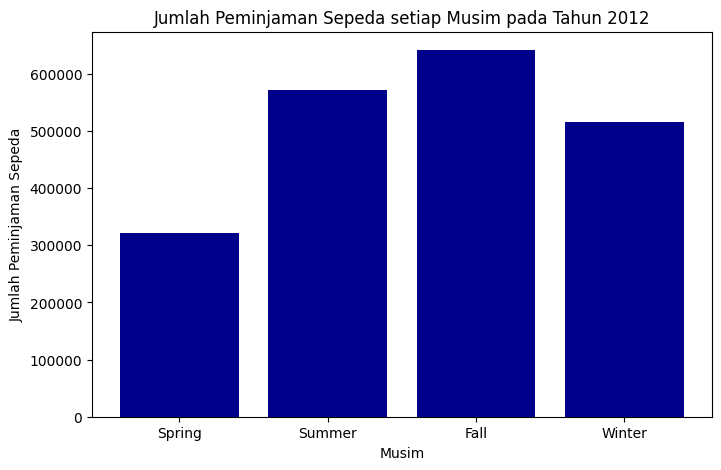

In [24]:
#Menampilkan visualisasi perbandingan jumlah peminjaman sepeda per musim di tahun 2012 dengan bar
plt.figure(figsize=(8, 5))
plt.bar(jumlah_peminjaman_per_musim_2012['season'], jumlah_peminjaman_per_musim_2012['cnt'], color='darkblue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Jumlah Peminjaman Sepeda setiap Musim pada Tahun 2012')

plt.show()

## Conclusion

1. Berdasarkan hasil analisis di atas, dapat diketahui bahwa terdapat korelasi atau hubungan positif temperatur feeling (yang dirasakan manusia) dan temperatur aktual mempengaruhi jumlah peminjaman sepeda dengan kesimpulan sebagai berikut.
- Pada eksplorasi data, temperatur yang di rasakan manusia memiliki korelasi atau tingkat kesesuaian hampir sempurna dengan temperatur aktual.
- Sebaran data pada scatterplot hasil visualisasi dan explanatory analysis menunjukkan semakin tinggi nilai dari temperature feeling dan temperatur aktual, maka semakin banyak jumlah pemesanan peminjaman sepeda. Jadi, jumlah pemesanan peminjaman sepeda cenderung semakin banyak apabila kondisi atau nilai temperatur feeling dan aktual juga meningkat.
- Dengan memahami hubungan antara kondisi temperatur dan pola peminjaman sepeda, perusahaan dapat mengoptimalkan strategi pemasaran maupun pelayanan yang baik dalam mendukung perkembangan bisnis.

2. Berdasarkan hasil analisis data, dapat diketahui hasil analisis sebagai berikut.

- Pada tahun 2012, musim ke-3 yaitu Fall season (musim gugur) memiliki jumlah peminjaman sepeda terbanyak dengan total 641479.
- Jumlah peminjaman sepeda antar tiap musim memiliki selisih yang lumayan tinggi, sehingga dengan mengetahui musim yang memiliki jumlah peminjaman sepeda terbanyak di tahun terbaru pada data, musim dapat menjadi salah satu faktor pengaruh terhadap jumlah peminjaman sepeda secara keseluruhan.

In [25]:
hour_bike.to_csv("all_data.csv", index=False)